In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
backup_df = df

In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Columns:
1. id - Unique identifier for each property
2. date - Date of property listing
3. price - Property price in currency
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft_living - Living area size in square feet
7. sqft_lot - Total lot size in square feet
8. floors - Number of floors
9. waterfront - Indicates if property has waterfront view (0 for no, 1 for yes).
10. view - Quality level of property view (0 to 4)
11. condition - Overall condition rating (1 to 5)
12. grade - Overall grade rating (1 to 13)
13. sqft_above - Living area above ground level in square feet
14. sqft_basement - Basement area in square feet
15. yr_built - Year property was built
16. yr_renovated - Year property was last renovated (0 if never)
17. zipcode - Property location zip code
18. lat - Latitude coordinate of property location
19. long - Longitude coordinate of property location
20. sqft_living15 - Living area size of 15 nearest properties in square feet
21. sqft_lot15 - Lot size of 15 nearest properties in square feet

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=['id'], inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df[['date']].head(10)

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
5,20140512T000000
6,20140627T000000
7,20150115T000000
8,20150415T000000
9,20150312T000000


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df[['date']].head(10)

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
5,2014-05-12
6,2014-06-27
7,2015-01-15
8,2015-04-15
9,2015-03-12


In [13]:
df['date'].dt.year.value_counts()

date
2014    14633
2015     6980
Name: count, dtype: int64

In [14]:
df['date'].dt.month.value_counts().sort_index()

date
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: count, dtype: int64

In [15]:
df['listed_year'] = df['date'].dt.year
df['listed_month'] = df['date'].dt.month

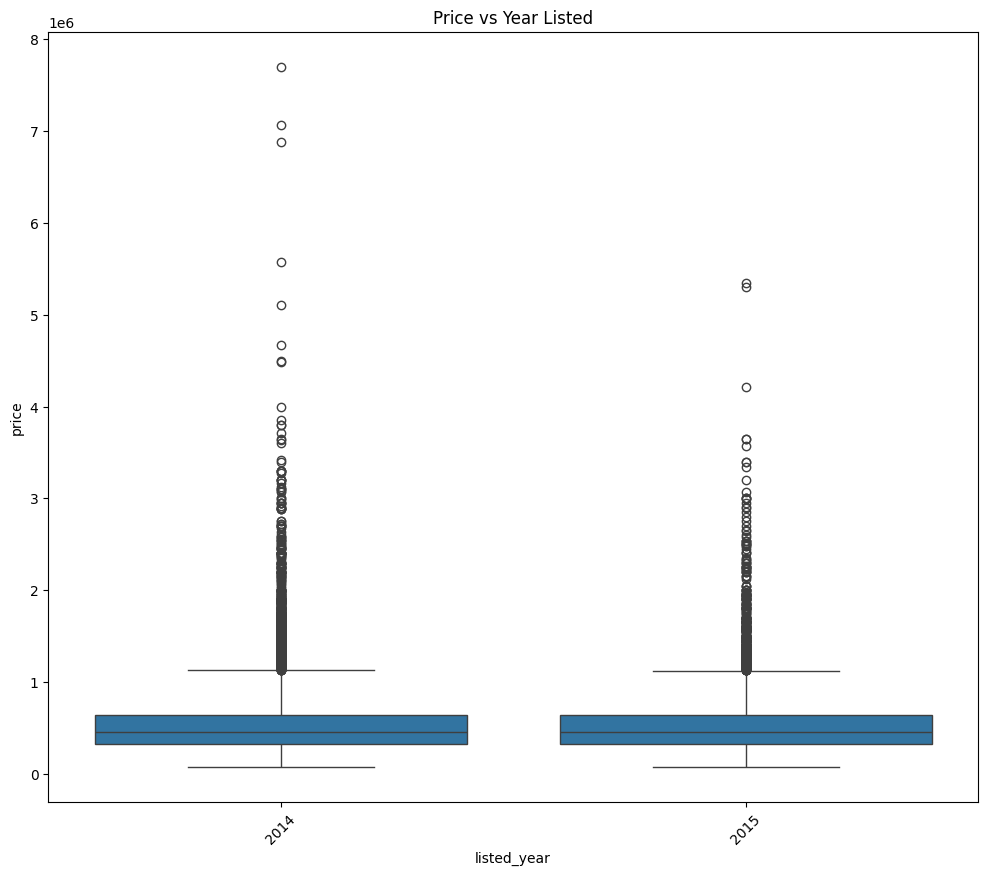

In [16]:
plt.figure(figsize=(12,10))
sns.boxplot(x='listed_year', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Year Listed")
plt.show()

In [17]:
df.groupby('listed_year', as_index=False)['price'].median()

,listed_year,price
0,2014,450000.0
1,2015,450500.0


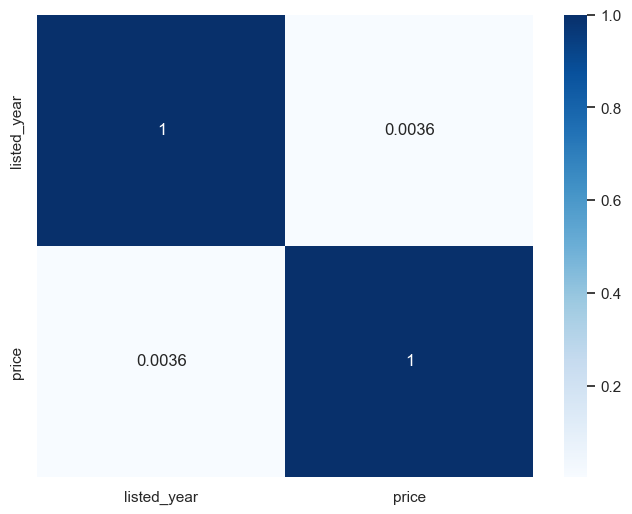

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['listed_year', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: listed_year (that shows the year when property was listed) is not adding any predictive value hence can be dropped.

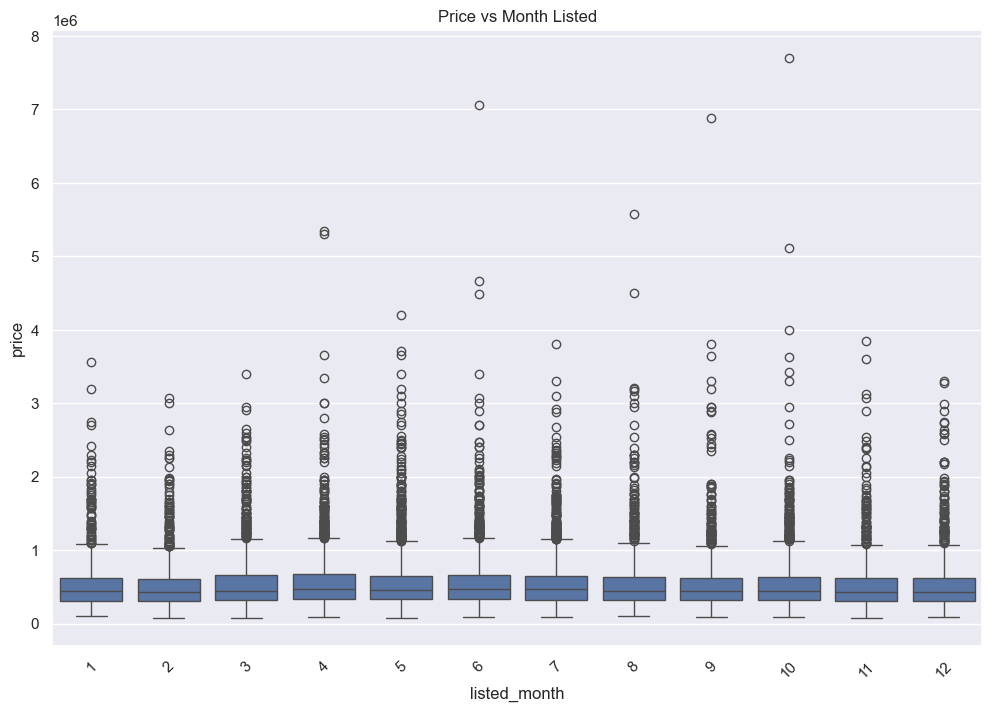

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='listed_month', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Month Listed")
plt.show()

In [20]:
df.groupby('listed_month', as_index=False)['price'].median()

,listed_month,price
0,1,438500.0
1,2,425545.0
2,3,450000.0
3,4,476500.0
4,5,462000.0
5,6,465000.0
6,7,465000.0
7,8,442100.0
8,9,450000.0
9,10,446900.0


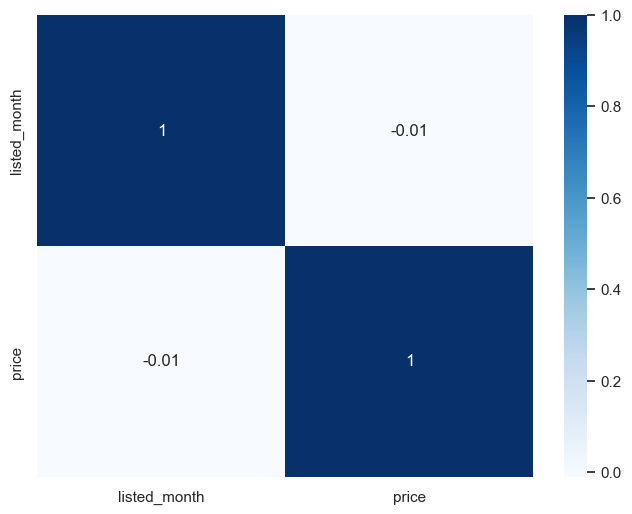

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['listed_month', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: listed_month (shows the month when the property was listed) shows weak correlation but encoding months into season can bring a deeper insight.

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_year,listed_month
0,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [23]:
def season(month):
    if month <= 4:
        return 'Spring'
    
    elif month <= 8:
        return 'Summer'

    else:
        return 'Fall'


df['listed_season'] = df['listed_month'].apply(season)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_year,listed_month,listed_season
0,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,Fall
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,Spring
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,Fall
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,Spring


In [24]:
df.drop(columns=['listed_year', 'listed_month', 'date'], inplace=True)

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_season
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Fall
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Spring
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Fall
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Spring


In [26]:
dfnums = df.select_dtypes(include='number')

In [27]:
dfnums.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


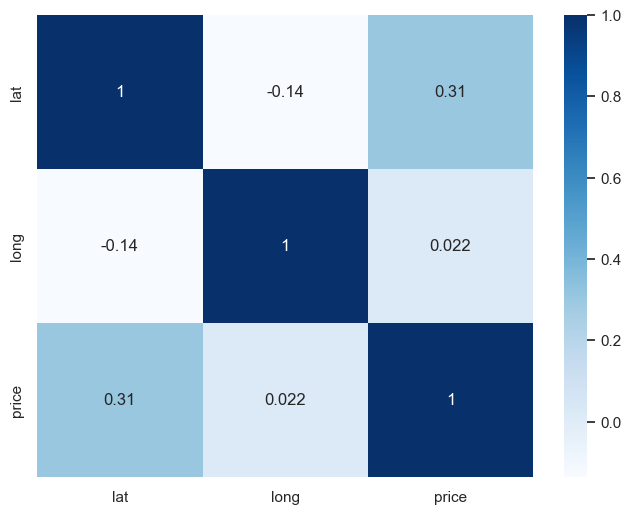

In [28]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['lat', 'long', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: while lat has a moderate positive correlation with price long has negligible correlation, instead using zipcode to capture regional price differences would be a better approach.

In [29]:
df.drop(columns=['lat', 'long'], inplace=True)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,listed_season
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Fall
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Spring
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Fall
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Spring


In [31]:
df['zipcode'] = df['zipcode'].astype('object')
df['zipcode'].dtype

dtype('O')

In [32]:
df['yr_renovated'].nunique()

70

In [33]:
def renovated(year):
    if year == 0:
        return "No"
    else:
        return "Yes"


df['renovated'] = df['yr_renovated'].apply(renovated)
df.drop(columns=['yr_renovated'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,listed_season,renovated
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650,Fall,No
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,Fall,Yes
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062,Spring,No
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,Fall,No
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,Spring,No


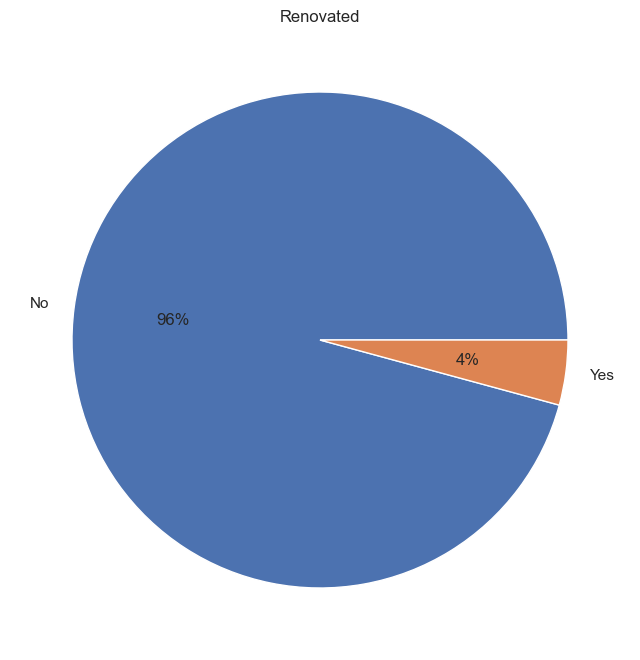

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
plt.pie(df['renovated'].value_counts(), labels=df['renovated'].unique(), autopct='%1.0f%%')
plt.title("Renovated")
plt.show()

In [35]:
dfsqft = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

In [36]:
dfsqft.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,231300.0
1,2570,7242,2170,400,1690,7639,538000.0
2,770,10000,770,0,2720,8062,180000.0
3,1960,5000,1050,910,1360,5000,604000.0
4,1680,8080,1680,0,1800,7503,510000.0


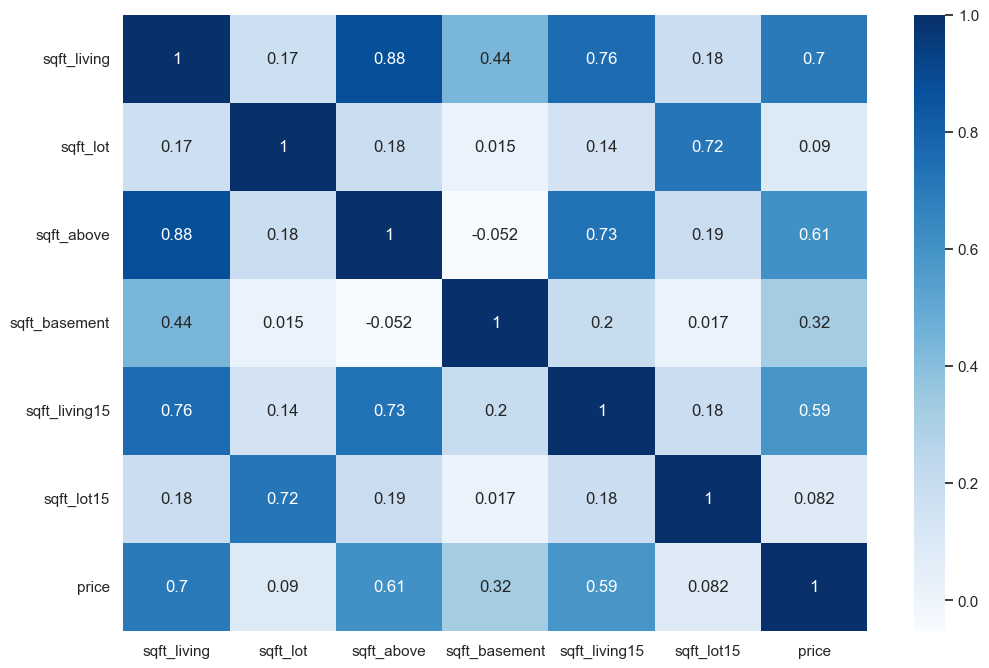

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

##### sqft_lot and sqft_lot15 do not add any significant predictive power it is better to drop and reduce dimensionality

In [38]:
dfsqft = dfsqft.drop(columns=['sqft_lot', 'sqft_lot15'])

In [39]:
dfsqft.head()

,sqft_living,sqft_above,sqft_basement,sqft_living15,price
0,1180,1180,0,1340,231300.0
1,2570,2170,400,1690,538000.0
2,770,770,0,2720,180000.0
3,1960,1050,910,1360,604000.0
4,1680,1680,0,1800,510000.0


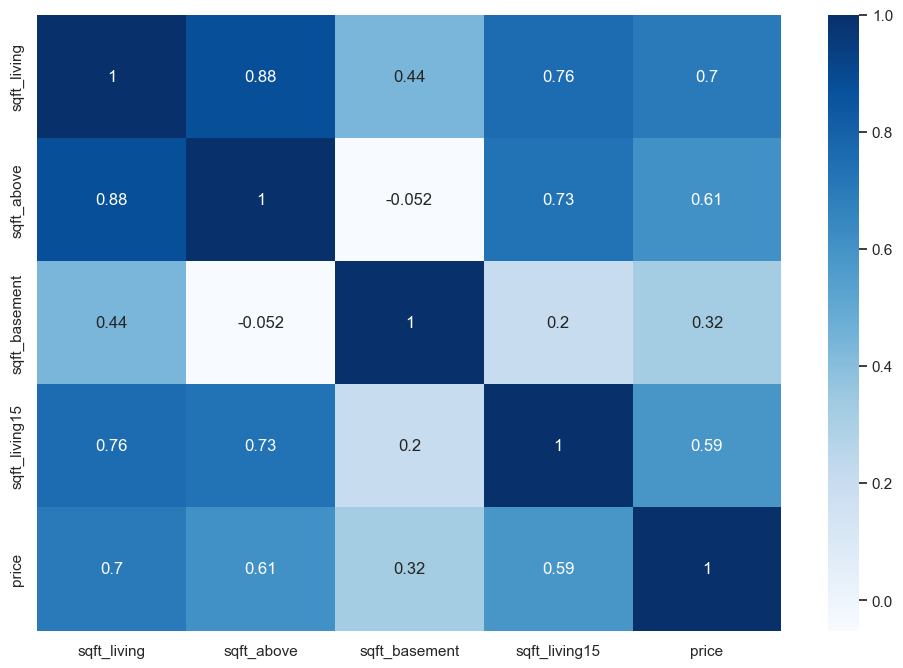

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: 
- sqft_living15 is moderately correlated with price but highly collinear with sqft_living, can be dropped.
- sqft_above overlaps heavily with sqft_living so keeping both risks multicollinearity, can be dropped.
- sqft_living is the strongest predictor of price.
- sqft_basement is moderately correlated with price and minorly correlated with others, can be dropped after initial model testing.

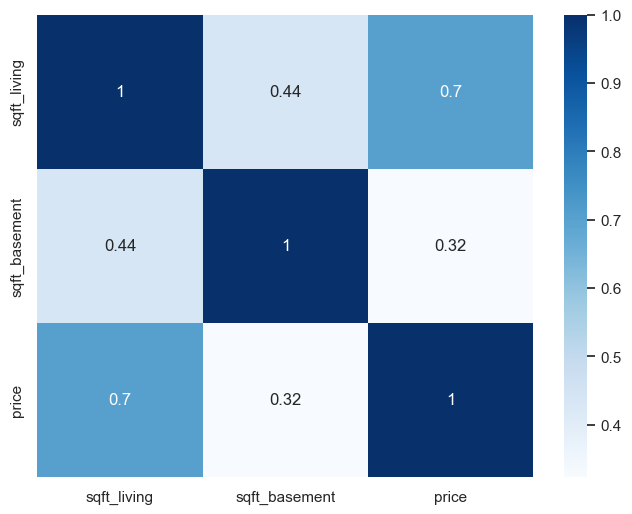

In [41]:
dfsqft = dfsqft.drop(columns=['sqft_living15', 'sqft_above'])
plt.figure(figsize=(8,6))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

In [42]:
df.drop(columns=['sqft_lot', 'sqft_lot15','sqft_living15', 'sqft_above'], inplace=True)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,listed_season,renovated
0,231300.0,2,1.00,1180,1.0,0,0,3,7,0,1955,98178,Fall,No
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,1951,98125,Fall,Yes
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,1933,98028,Spring,No
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,1965,98136,Fall,No
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,1987,98074,Spring,No


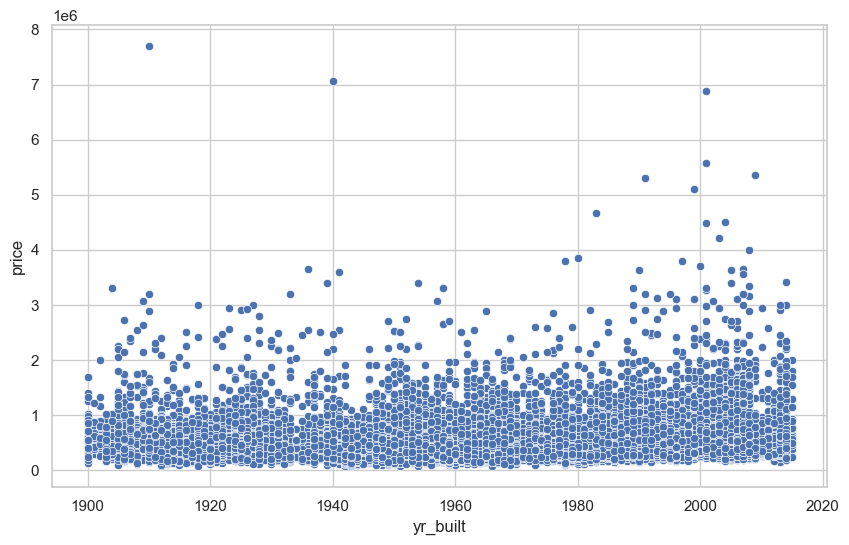

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='yr_built', y='price')
plt.show()

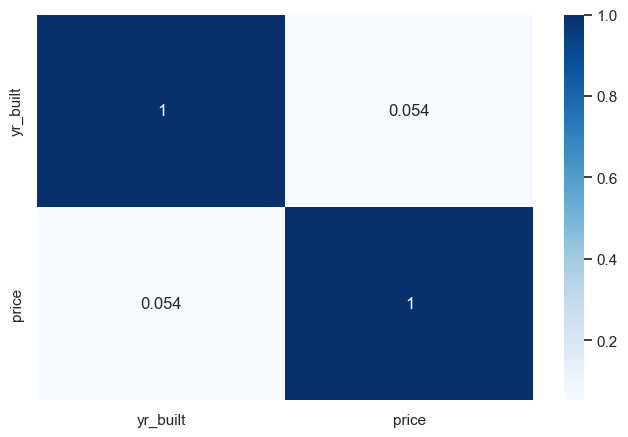

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['yr_built','price']].corr(), annot=True, cmap='Blues')
plt.show()

##### yr_built as a numeric feature does not add any significant value, mapping it to ordinal category can be valuable.

In [46]:
def property_type(year):
    if year < 1980:
        return 'Old'
    elif year < 2000:
        return 'Medium'
    else:
        return 'New'

df['property_type'] = df['yr_built'].apply(property_type)
df.drop(columns='yr_built', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,1.0,0,0,3,7,0,98178,Fall,No,Old
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,98125,Fall,Yes,Old
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,98028,Spring,No,Old
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,98136,Fall,No,Old
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,98074,Spring,No,Medium


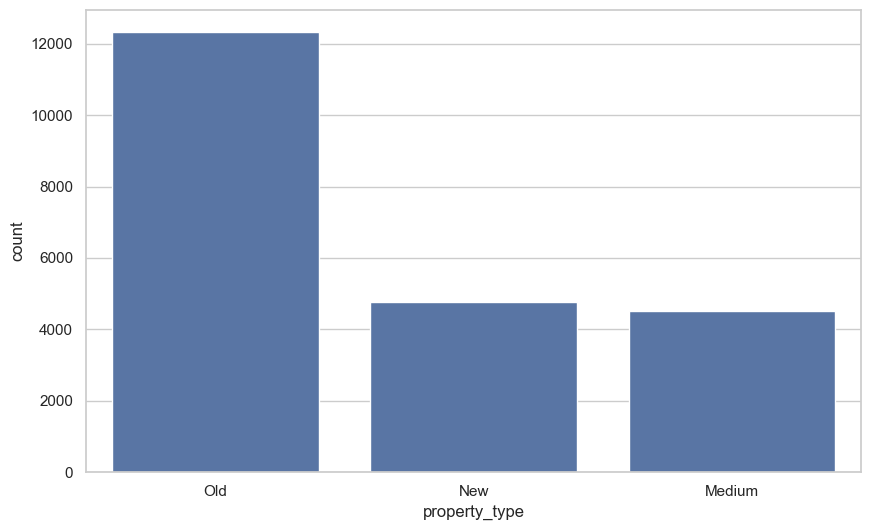

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(df, x='property_type', order=df['property_type'].value_counts().index)
plt.show()

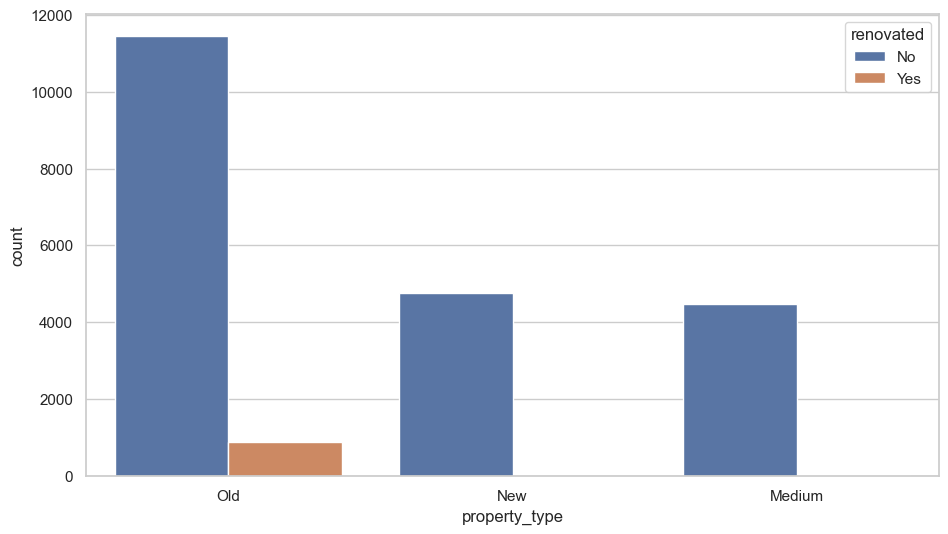

In [63]:
plt.figure(figsize=(11,6))
sns.countplot(df, x='property_type', order=df['property_type'].value_counts().index, hue='renovated')
plt.show()

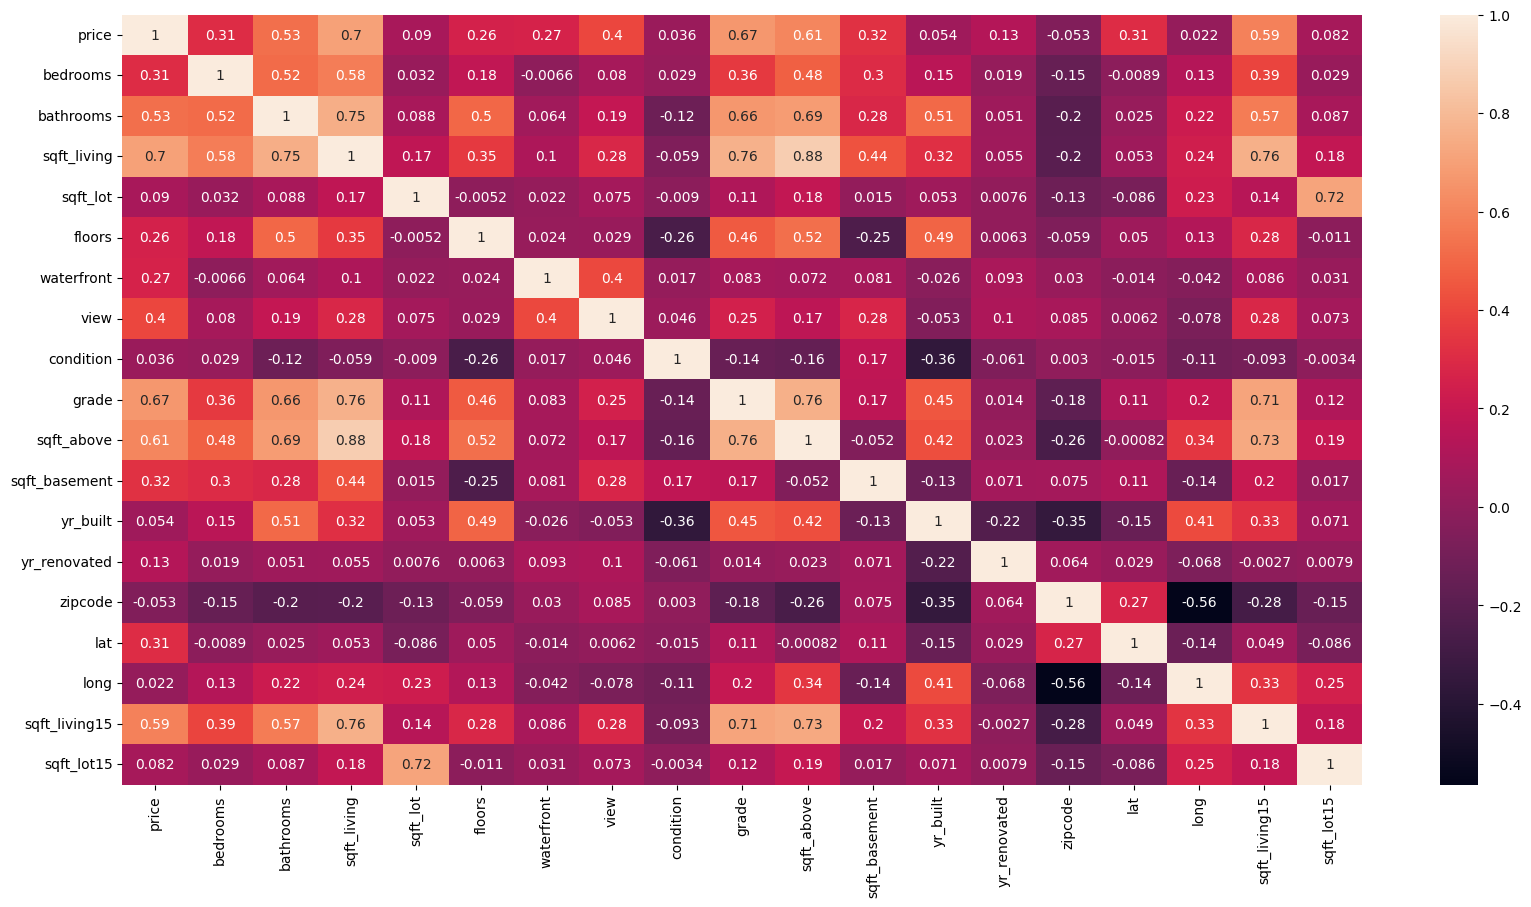

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(dfnums.corr(), annot=True)
plt.show()

In [101]:
dfnums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [97]:
dfnums['bedrooms'].value_counts().reset_index()

,bedrooms,count
0,3,9823
1,4,6882
2,2,2761
3,5,1601
4,6,272
5,1,199
6,7,38
7,0,13
8,8,13
9,9,6


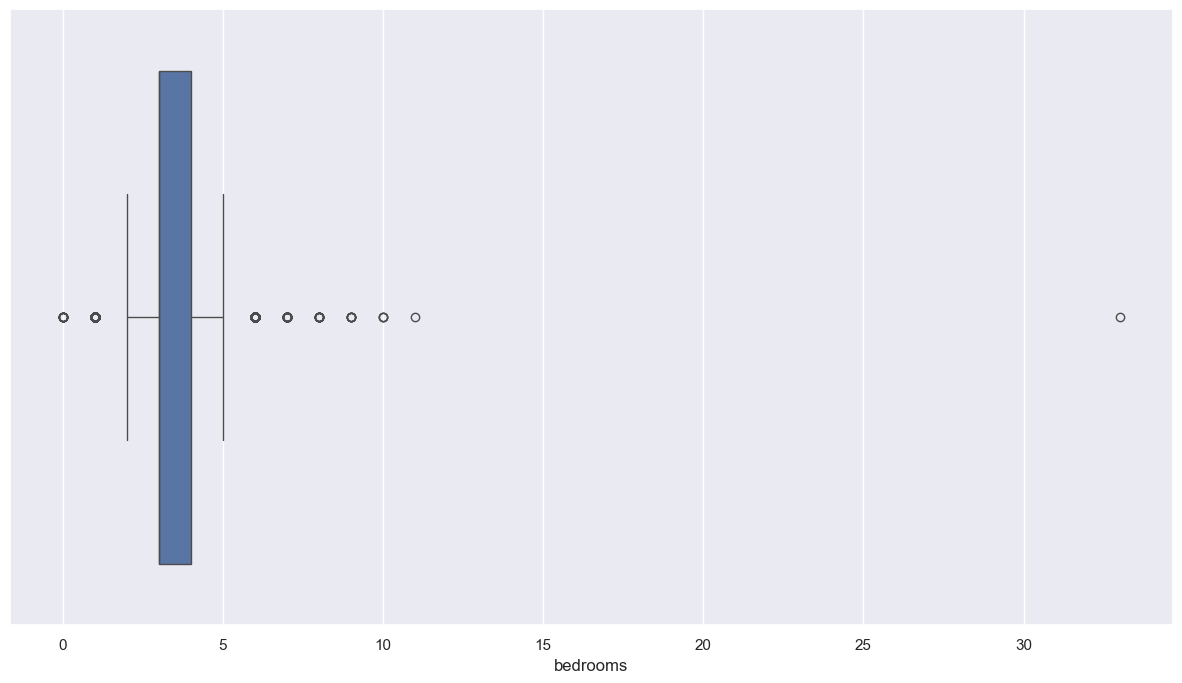

In [98]:
sns.set_theme(style="darkgrid", palette='deep')
plt.figure(figsize=(15,8))
sns.boxplot(x=df['bedrooms'])
plt.show()

In [100]:
df['bathrooms'].value_counts().reset_index()

,bathrooms,count
0,2.50,5380
1,1.00,3852
2,1.75,3048
3,2.25,2047
4,2.00,1930
5,1.50,1446
6,2.75,1185
7,3.00,753
8,3.50,731
9,3.25,589


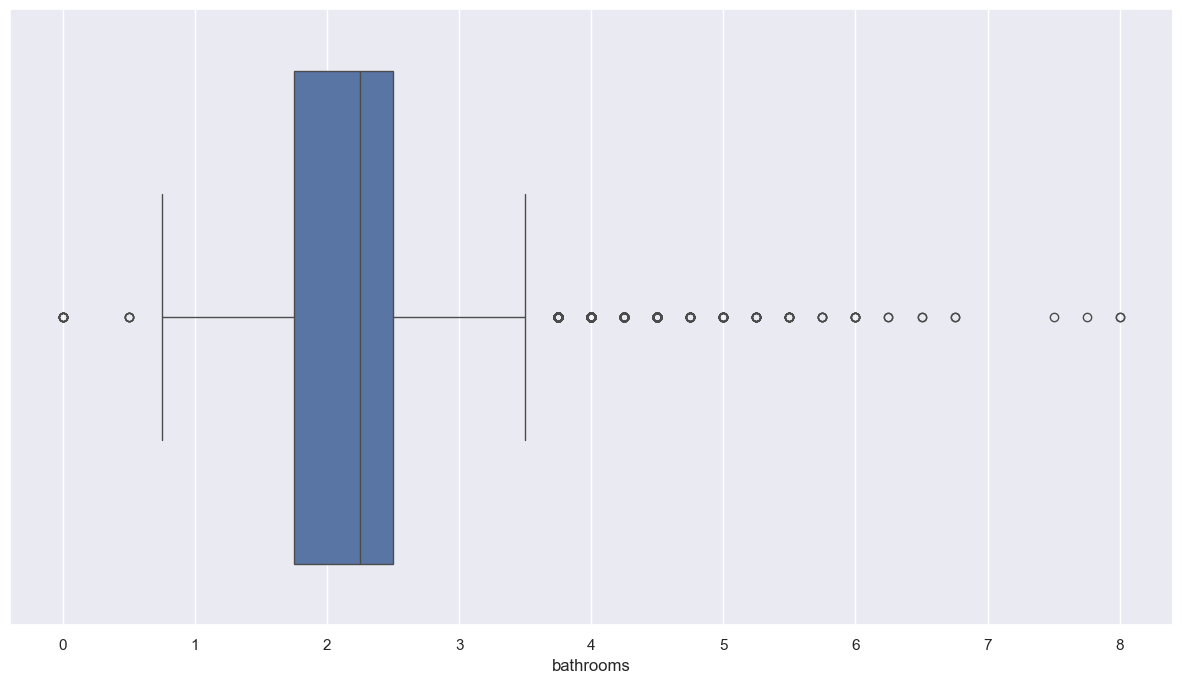

In [99]:
sns.set_theme(style="darkgrid", palette='deep')
plt.figure(figsize=(15,8))
sns.boxplot(x=df['bathrooms'])
plt.show()

In [33]:
dfnums['bathrooms'].nunique()

30

In [34]:
dfnums['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

#### Analysis of numerical columns
- price - outcome variable
- bedrooms - feature
- bathrooms - feature
- sqft_living - potential strong feature
- sqft_lot - candidate feature
- floors - candidate feature
- waterfront - feature, requires conversion to boolean to preserve nominal propertry
- view - feature, ordinal nature
- condition - feature, ordinal nature
- grade - potential strong feature, ordinal nature
- sqft_above - potential strong feature
- sqft basement - candidate feature
- yr_built - feature, feature engineering of year
- yr_renovated - candidate feature, feature engineering required
- zipcode - candiate feature, requires conversion to categorical feature and one hot encoding to preserve nominal property
- lat - can be dropped
- long - can be dropped
- sqft_living15 - potential strong feature
- sqft_lot15 - candidate feature

In [36]:
df.drop(columns=['lat', 'long'], inplace=True)

In [37]:
df['zipcode'] = df['zipcode'].astype('object')

In [38]:
df['zipcode'].dtype

dtype('O')

In [39]:
df['waterfront'] = df['waterfront'].astype(bool)

In [40]:
df['waterfront'].dtype

dtype('bool')

In [41]:
def renovated(year):
    if year == 0:
        return "No"
    else:
        return "Yes"


df['renovated'] = df['yr_renovated'].apply(renovated)
df.drop(columns=['yr_renovated'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,listed_season,renovated
0,231300.0,2,1.00,1180,5650,1.0,False,0,3,7,1180,0,1955,98178,1340,5650,Fall,No
1,538000.0,3,2.25,2570,7242,2.0,False,0,3,7,2170,400,1951,98125,1690,7639,Fall,Yes
2,180000.0,2,1.00,770,10000,1.0,False,0,3,6,770,0,1933,98028,2720,8062,Spring,No
3,604000.0,4,3.00,1960,5000,1.0,False,0,5,7,1050,910,1965,98136,1360,5000,Fall,No
4,510000.0,3,2.00,1680,8080,1.0,False,0,3,8,1680,0,1987,98074,1800,7503,Spring,No


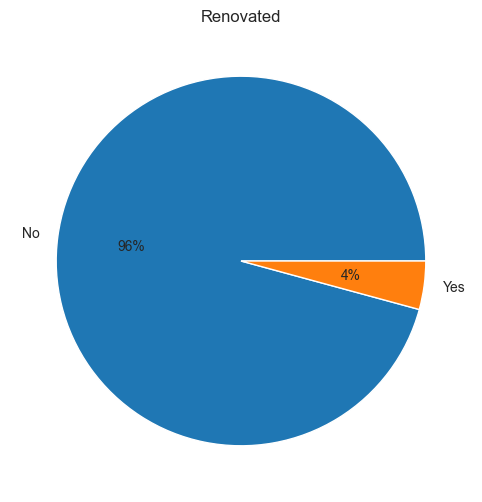

In [76]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.pie(df['renovated'].value_counts(), labels=df['renovated'].unique(), autopct='%1.0f%%')
plt.title("Renovated")
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  bool   
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  zipcode        21613 non-null  object 
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
 16  listed_season  21613 non-null  object 
 17  renovated      21613 non-null  object 
dtypes: boo

In [78]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'listed_season', 'renovated'],
      dtype='object')